In [26]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import pickle

In [27]:
with open("stdp.pickle", "rb") as file:
    stdp_data = pickle.load(file)
with open("drstdp.pickle", "rb") as file:
    drstdp_data = pickle.load(file)
with open("dsstdp.pickle", "rb") as file:
    dsstdp_data = pickle.load(file)

In [28]:
stdp_agg = {"rate": {}, "ttfs": {}}
for k, v in stdp_data["acc"].items():
    for mode in stdp_agg:
        stdp_agg[mode][k] = {}
        argmax = v[f"acc.{mode}"].argmax()
        stdp_agg[mode][k]["epoch"] = v["epoch"].iloc[argmax]
        stdp_agg[mode][k]["acc"] = v[f"acc.{mode}"].iloc[argmax]
        clsacc = stdp_data["acc"][k].iloc[argmax].loc[[f"clsacc.c{c}.{mode}" for c in range(10)]]
        stdp_agg[mode][k]["clsacc"] = {}
        stdp_agg[mode][k]["clsacc"]["mean"] = clsacc.mean()
        stdp_agg[mode][k]["clsacc"]["min"] = clsacc.min()
        stdp_agg[mode][k]["clsacc"]["q1"] = clsacc.quantile(0.25)
        stdp_agg[mode][k]["clsacc"]["median"] = clsacc.median()
        stdp_agg[mode][k]["clsacc"]["q3"] = clsacc.quantile(0.75)
        stdp_agg[mode][k]["clsacc"]["max"] = clsacc.max()


In [29]:
drstdp_agg = {"rate": {}, "ttfs": {}}
for k, v in drstdp_data["acc"].items():
    for mode in drstdp_agg:
        drstdp_agg[mode][k] = {}
        argmax = v[f"acc.{mode}"].argmax()
        drstdp_agg[mode][k]["epoch"] = v["epoch"].iloc[argmax]
        drstdp_agg[mode][k]["acc"] = v[f"acc.{mode}"].iloc[argmax]
        clsacc = drstdp_data["acc"][k].iloc[argmax].loc[[f"clsacc.c{c}.{mode}" for c in range(10)]]
        drstdp_agg[mode][k]["clsacc"] = {}
        drstdp_agg[mode][k]["clsacc"]["mean"] = clsacc.mean()
        drstdp_agg[mode][k]["clsacc"]["min"] = clsacc.min()
        drstdp_agg[mode][k]["clsacc"]["q1"] = clsacc.quantile(0.25)
        drstdp_agg[mode][k]["clsacc"]["median"] = clsacc.median()
        drstdp_agg[mode][k]["clsacc"]["q3"] = clsacc.quantile(0.75)
        drstdp_agg[mode][k]["clsacc"]["max"] = clsacc.max()


In [30]:
dsstdp_agg = {"rate": {}, "ttfs": {}}
for k, v in dsstdp_data["acc"].items():
    for mode in dsstdp_agg:
        dsstdp_agg[mode][k] = {}
        argmax = v[f"acc.{mode}"].argmax()
        dsstdp_agg[mode][k]["epoch"] = v["epoch"].iloc[argmax]
        dsstdp_agg[mode][k]["acc"] = v[f"acc.{mode}"].iloc[argmax]
        clsacc = dsstdp_data["acc"][k].iloc[argmax].loc[[f"clsacc.c{c}.{mode}" for c in range(10)]]
        dsstdp_agg[mode][k]["clsacc"] = {}
        dsstdp_agg[mode][k]["clsacc"]["mean"] = clsacc.mean()
        dsstdp_agg[mode][k]["clsacc"]["min"] = clsacc.min()
        dsstdp_agg[mode][k]["clsacc"]["q1"] = clsacc.quantile(0.25)
        dsstdp_agg[mode][k]["clsacc"]["median"] = clsacc.median()
        dsstdp_agg[mode][k]["clsacc"]["q3"] = clsacc.quantile(0.75)
        dsstdp_agg[mode][k]["clsacc"]["max"] = clsacc.max()

In [31]:
headers = [
    "DS-STDP (Acc)",
    "DS-STDP (Epoch)",
    "DR-STDP (Acc)",
    "DR-STDP (Epoch)",
    "STDP (Acc)",
    "STDP (Epoch)",
]
print("Rate-Based")
print(f"{''.join(' ' for _ in range(5))} | {' | '.join(headers)} |")
for n in (100, 225, 400, 625, 900):
    items = []
    for agg in (dsstdp_agg, drstdp_agg, stdp_agg):
        items.append(f"{float(agg['rate'][n]['acc']):.4f}")
        items.append(f"{int(agg['rate'][n]['epoch'])}")

    print(
        f"N={n}  | {' | '.join(f.rjust(len(h), " ") for f, h in zip(items, headers))} |"
    )

for n in (1225, 1600, 2025):
    items = [
        "",
        "",
        "",
        "",
        f"{float(stdp_agg['rate'][n]['acc']):.4f}",
        f"{int(stdp_agg['rate'][n]['epoch'])}",
    ]
    print(
        f"N={n} | {' | '.join(f.rjust(len(h), " ") for f, h in zip(items, headers))} |"
    )

Rate-Based
      | DS-STDP (Acc) | DS-STDP (Epoch) | DR-STDP (Acc) | DR-STDP (Epoch) | STDP (Acc) | STDP (Epoch) |
N=100  |        0.8626 |              14 |        0.8415 |              10 |     0.8561 |           12 |
N=225  |        0.8836 |              24 |        0.8752 |              13 |     0.8773 |           17 |
N=400  |        0.8986 |              46 |        0.8919 |              21 |     0.8911 |           22 |
N=625  |        0.9104 |              78 |        0.8987 |              24 |     0.8943 |           18 |
N=900  |        0.9174 |              78 |        0.9011 |              25 |     0.8997 |           28 |
N=1225 |               |                 |               |                 |     0.9063 |           28 |
N=1600 |               |                 |               |                 |     0.9001 |           41 |
N=2025 |               |                 |               |                 |     0.9050 |           86 |


In [32]:
headers = [
    "DS-STDP (Acc)",
    "DS-STDP (Epoch)",
    "DR-STDP (Acc)",
    "DR-STDP (Epoch)",
    "STDP (Acc)",
    "STDP (Epoch)",
]
print("Latency-Based")
print(f"{''.join(' ' for _ in range(5))} | {' | '.join(headers)} |")
for n in (100, 225, 400, 625, 900):
    items = []
    for agg in (dsstdp_agg, drstdp_agg, stdp_agg):
        items.append(f"{float(agg['ttfs'][n]['acc']):.4f}")
        items.append(f"{int(agg['ttfs'][n]['epoch'])}")

    print(f"N={n}  | {' | '.join(f.rjust(len(h), " ") for f, h in zip(items, headers))} |")

for n in (1225, 1600, 2025):
    items = [
        "",
        "",
        "",
        "",
        f"{float(stdp_agg['ttfs'][n]['acc']):.4f}",
        f"{int(stdp_agg['ttfs'][n]['epoch'])}",
    ]
    print(
        f"N={n} | {' | '.join(f.rjust(len(h), " ") for f, h in zip(items, headers))} |"
    )

Latency-Based
      | DS-STDP (Acc) | DS-STDP (Epoch) | DR-STDP (Acc) | DR-STDP (Epoch) | STDP (Acc) | STDP (Epoch) |
N=100  |        0.8579 |              18 |        0.8426 |              20 |     0.8511 |           17 |
N=225  |        0.8868 |              37 |        0.8784 |              28 |     0.8734 |           22 |
N=400  |        0.9017 |              53 |        0.8937 |              44 |     0.8847 |           26 |
N=625  |        0.9119 |              78 |        0.8981 |              46 |     0.8928 |           40 |
N=900  |        0.9196 |              99 |        0.8982 |              56 |     0.8970 |           52 |
N=1225 |               |                 |               |                 |     0.9031 |           47 |
N=1600 |               |                 |               |                 |     0.9008 |           78 |
N=2025 |               |                 |               |                 |     0.9040 |           72 |


In [33]:
print(f"DS-STDP: {(dsstdp_agg['ttfs'][900]['acc'] - dsstdp_agg['ttfs'][625]['acc']):.4f}")
print(f"DR-STDP: {(drstdp_agg['rate'][900]['acc'] - drstdp_agg['rate'][625]['acc']):.4f}")
print(f"STDP: {(stdp_agg['rate'][900]['acc'] - stdp_agg['rate'][625]['acc']):.4f}")

DS-STDP: 0.0077
DR-STDP: 0.0024
STDP: 0.0054


In [34]:
stdp_rateacc = np.array([stdp_agg["rate"][n]["acc"] for n in (100, 225, 400, 625, 900)])
stdp_rateacc_delta = np.array([n2 - n1 for n1, n2 in zip(stdp_rateacc[:-1], stdp_rateacc[1:])])
stdp_rateacc_delta * 100

array([2.12000012, 1.3800025 , 0.31999946, 0.5400002 ])

In [35]:
drstdp_rateacc = np.array([drstdp_agg["rate"][n]["acc"] for n in (100, 225, 400, 625, 900)])
drstdp_rateacc_delta = np.array([n2 - n1 for n1, n2 in zip(drstdp_rateacc[:-1], drstdp_rateacc[1:])])
drstdp_rateacc_delta * 100

array([3.36999893, 1.67000294, 0.67999959, 0.2399981 ])

In [36]:
dsstdp_rateacc = np.array([dsstdp_agg["rate"][n]["acc"] for n in (100, 225, 400, 625, 900)])
dsstdp_rateacc_delta = np.array([n2 - n1 for n1, n2 in zip(dsstdp_rateacc[:-1], dsstdp_rateacc[1:])])
dsstdp_rateacc_delta * 100

array([2.10000277, 1.49999857, 1.17999911, 0.70000291])

In [37]:
rate_acc = {"x": np.array([100, 225, 400, 625, 900])}
for k, v in zip(("stdp", "drstdp", "dsstdp"), (stdp_agg, drstdp_agg, dsstdp_agg)):
    rate_acc[f"y_{k}"] = np.array([v["rate"][n]["acc"] for n in rate_acc["x"]])

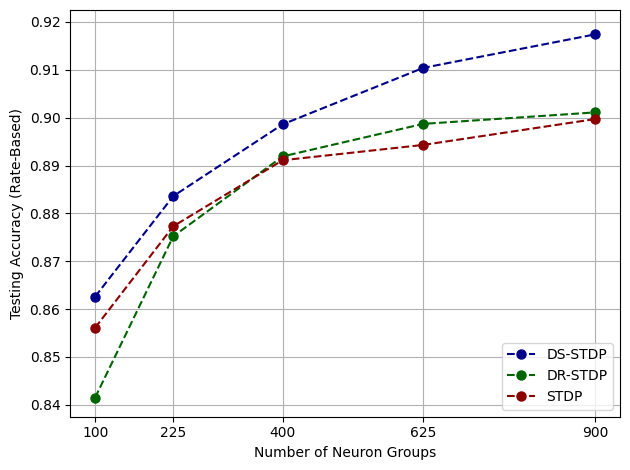

In [38]:
fig, ax = plt.subplots()

ax.plot(
    rate_acc["x"],
    rate_acc["y_dsstdp"],
    linestyle="--",
    marker="o",
    ms=6.5,
    color="darkblue",
    label="DS-STDP",
)
ax.plot(
    rate_acc["x"],
    rate_acc["y_drstdp"],
    linestyle="--",
    marker="o",
    ms=6.5,
    color="darkgreen",
    label="DR-STDP",
)
ax.plot(
    rate_acc["x"],
    rate_acc["y_stdp"],
    linestyle="--",
    marker="o",
    ms=6.5,
    color="darkred",
    label="STDP",
)

plt.grid(True)
plt.ylim(0.8375, 0.9225)
plt.xlabel("Number of Neuron Groups")
plt.ylabel("Testing Accuracy (Rate-Based)")
plt.legend(ncol=1, loc="lower right")
plt.xticks([100, 225, 400, 625, 900])
plt.tight_layout()
#plt.show()
plt.savefig("plots/testacc-rate.png", dpi=1200)

In [39]:
ttfs_acc = {"x": np.array([100, 225, 400, 625, 900])}
for k, v in zip(("stdp", "drstdp", "dsstdp"), (stdp_agg, drstdp_agg, dsstdp_agg)):
    ttfs_acc[f"y_{k}"] = np.array([v["ttfs"][n]["acc"] for n in ttfs_acc["x"]])

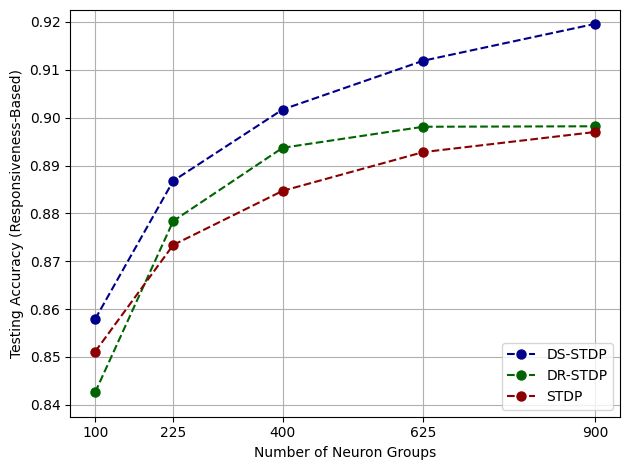

In [40]:
fig, ax = plt.subplots()

ax.plot(
    ttfs_acc["x"],
    ttfs_acc["y_dsstdp"],
    linestyle="--",
    marker="o",
    ms=6.5,
    color="darkblue",
    label="DS-STDP",
)
ax.plot(
    ttfs_acc["x"],
    ttfs_acc["y_drstdp"],
    linestyle="--",
    marker="o",
    ms=6.5,
    color="darkgreen",
    label="DR-STDP",
)
ax.plot(
    ttfs_acc["x"],
    ttfs_acc["y_stdp"],
    linestyle="--",
    marker="o",
    ms=6.5,
    color="darkred",
    label="STDP",
)

plt.grid(True)
plt.ylim(0.8375, 0.9225)
plt.xlabel("Number of Neuron Groups")
plt.ylabel("Testing Accuracy (Responsiveness-Based)")
plt.legend(ncol=1, loc="lower right")
plt.xticks([100, 225, 400, 625, 900])
plt.tight_layout()
#plt.show()
plt.savefig("plots/testacc-ttfs.png", dpi=1200)

In [41]:
both_epoch = {"x": np.array([100, 225, 400, 625, 900])}
for k, v in zip(("stdp", "drstdp", "dsstdp"), (stdp_agg, drstdp_agg, dsstdp_agg)):
    both_epoch[f"y_rate_{k}"] = np.array([v["rate"][n]["epoch"] for n in both_epoch["x"]])
    both_epoch[f"y_ttfs_{k}"] = np.array([v["ttfs"][n]["epoch"] for n in both_epoch["x"]])

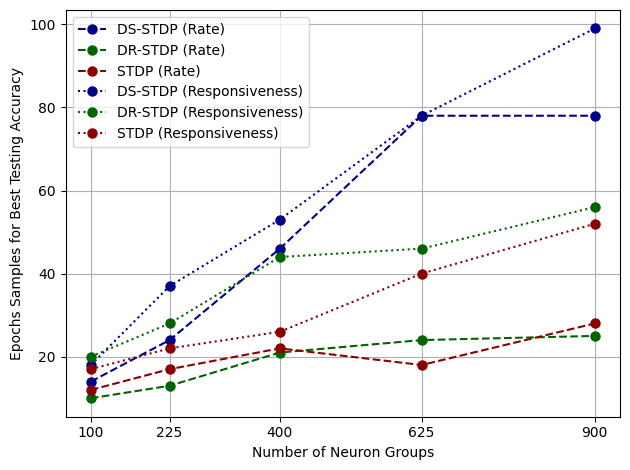

In [42]:
fig, ax = plt.subplots()

ax.plot(
    both_epoch["x"],
    both_epoch["y_rate_dsstdp"],
    linestyle="--",
    marker="o",
    ms=6.5,
    color="darkblue",
    label="DS-STDP (Rate)",
)
ax.plot(
    both_epoch["x"],
    both_epoch["y_rate_drstdp"],
    linestyle="--",
    marker="o",
    ms=6.5,
    color="darkgreen",
    label="DR-STDP (Rate)",
)
ax.plot(
    both_epoch["x"],
    both_epoch["y_rate_stdp"],
    linestyle="--",
    marker="o",
    ms=6.5,
    color="darkred",
    label="STDP (Rate)",
)

ax.plot(
    both_epoch["x"],
    both_epoch["y_ttfs_dsstdp"],
    linestyle=":",
    marker="o",
    ms=6.5,
    color="darkblue",
    label="DS-STDP (Responsiveness)",
)

ax.plot(
    both_epoch["x"],
    both_epoch["y_ttfs_drstdp"],
    linestyle=":",
    marker="o",
    ms=6.5,
    color="darkgreen",
    label="DR-STDP (Responsiveness)",
)

ax.plot(
    both_epoch["x"],
    both_epoch["y_ttfs_stdp"],
    linestyle=":",
    marker="o",
    ms=6.5,
    color="darkred",
    label="STDP (Responsiveness)",
)

plt.grid(True)
plt.xlabel("Number of Neuron Groups")
plt.ylabel("Epochs Samples for Best Testing Accuracy")
plt.legend(ncol=1, loc="upper left")
plt.xticks([100, 225, 400, 625, 900])
plt.tight_layout()
plt.show()
#plt.savefig("plots/testacc-epochs.png", dpi=1200)

In [43]:
best_acc = {"x": np.array([100, 225, 400, 625, 900])}
for k, v in zip(("stdp", "drstdp", "dsstdp"), (stdp_agg, drstdp_agg, dsstdp_agg)):
    _rate_acc = [v["rate"][n]["acc"] for n in best_acc["x"]]
    _ttfs_acc = [v["ttfs"][n]["acc"] for n in best_acc["x"]]
    method = [0 if racc >= tacc else 1 for racc, tacc in zip(_rate_acc, _ttfs_acc)]
    best_acc[f"y_{k}"] = np.array([max(racc, tacc) for racc, tacc in zip(_rate_acc, _ttfs_acc)])
    best_acc[f"x_rate_{k}"] = np.array([n for m, n in zip(method, best_acc["x"]) if m == 0])
    best_acc[f"x_ttfs_{k}"] = np.array([n for m, n in zip(method, best_acc["x"]) if m == 1])
    best_acc[f"y_rate_{k}"] = np.array([n for m, n in zip(method, _rate_acc) if m == 0])
    best_acc[f"y_ttfs_{k}"] = np.array([n for m, n in zip(method, _ttfs_acc) if m == 1])

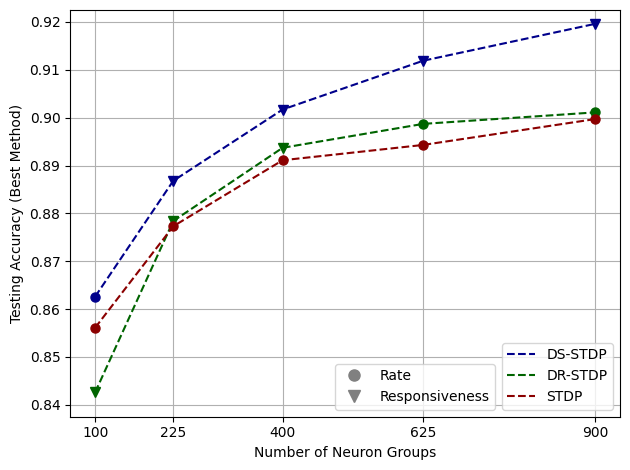

In [44]:
fig, ax = plt.subplots()

ax.plot(
    best_acc["x"],
    best_acc["y_dsstdp"],
    linestyle="--",
    color="darkblue",
    label="DS-STDP",
)

for xi, yi in zip(best_acc["x_rate_dsstdp"], best_acc["y_rate_dsstdp"]):
    ax.plot(xi, yi, marker="o", ms=6.5, color="darkblue")

for xi, yi in zip(best_acc["x_ttfs_dsstdp"], best_acc["y_ttfs_dsstdp"]):
    ax.plot(xi, yi, marker="v", ms=6.5, color="darkblue")

ax.plot(
    best_acc["x"],
    best_acc["y_drstdp"],
    linestyle="--",
    color="darkgreen",
    label="DR-STDP",
)

for xi, yi in zip(best_acc["x_rate_drstdp"], best_acc["y_rate_drstdp"]):
    ax.plot(xi, yi, marker="o", ms=6.5, color="darkgreen")

for xi, yi in zip(best_acc["x_ttfs_drstdp"], best_acc["y_ttfs_drstdp"]):
    ax.plot(xi, yi, marker="v", ms=6.5, color="darkgreen")

ax.plot(
    best_acc["x"],
    best_acc["y_stdp"],
    linestyle="--",
    color="darkred",
    label="STDP",
)

for xi, yi in zip(best_acc["x_rate_stdp"], best_acc["y_rate_stdp"]):
    ax.plot(xi, yi, marker="o", ms=6.5, color="darkred")

for xi, yi in zip(best_acc["x_ttfs_stdp"], best_acc["y_ttfs_stdp"]):
    ax.plot(xi, yi, marker="v", ms=6.5, color="darkred")

custom_markers = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="gray",
        linestyle="",
        markersize=8,
        label="Rate",
    ),
    Line2D(
        [0],
        [0],
        marker="v",
        color="gray",
        linestyle="",
        markersize=8,
        label="Responsiveness",
    ),
]

plt.grid(True)
plt.ylim(0.8375, 0.9225)
plt.xlabel("Number of Neuron Groups")
plt.ylabel("Testing Accuracy (Best Method)")
leg1 = ax.legend(ncol=1, loc="lower right")
leg2 = ax.legend(handles=custom_markers, loc='lower right', bbox_to_anchor=(0.785, 0.0))
ax.add_artist(leg1)
plt.xticks([100, 225, 400, 625, 900])
plt.tight_layout()
plt.show()
# plt.savefig("plots/testacc-best.png", dpi=1200)

In [45]:
nbest_acc = {
    "x": np.array([100, 225, 400, 625, 900]),
    "x2": np.array([1225, 1600, 2025]),
}
for k, v in zip(("stdp", "drstdp", "dsstdp"), (stdp_agg, drstdp_agg, dsstdp_agg)):
    _rate_acc = [v["rate"][n]["acc"] for n in nbest_acc["x"]]
    _ttfs_acc = [v["ttfs"][n]["acc"] for n in nbest_acc["x"]]
    method = [0 if racc >= tacc else 1 for racc, tacc in zip(_rate_acc, _ttfs_acc)]
    nbest_acc[f"y_{k}"] = np.array(
        [max(racc, tacc) for racc, tacc in zip(_rate_acc, _ttfs_acc)]
    )
    nbest_acc[f"x_rate_{k}"] = np.array(
        [n for m, n in zip(method, nbest_acc["x"]) if m == 0]
    )
    nbest_acc[f"x_ttfs_{k}"] = np.array(
        [n for m, n in zip(method, nbest_acc["x"]) if m == 1]
    )
    if k != "stdp":
        nbest_acc[f"x_rate_{k}"] = nbest_acc[f"x_rate_{k}"] * 2
        nbest_acc[f"x_ttfs_{k}"] = nbest_acc[f"x_ttfs_{k}"] * 2
    nbest_acc[f"y_rate_{k}"] = np.array(
        [n for m, n in zip(method, _rate_acc) if m == 0]
    )
    nbest_acc[f"y_ttfs_{k}"] = np.array(
        [n for m, n in zip(method, _ttfs_acc) if m == 1]
    )

_rate_acc = [stdp_agg["rate"][n]["acc"] for n in nbest_acc["x2"]]
_ttfs_acc = [stdp_agg["ttfs"][n]["acc"] for n in nbest_acc["x2"]]
method = [0 if racc >= tacc else 1 for racc, tacc in zip(_rate_acc, _ttfs_acc)]

nbest_acc["y_stdp"] = np.concat(
    (
        nbest_acc["y_stdp"],
        np.array([max(racc, tacc) for racc, tacc in zip(_rate_acc, _ttfs_acc)]),
    )
)
nbest_acc["x_rate_stdp"] = np.concat(
    (
        nbest_acc["x_rate_stdp"],
        np.array([n for m, n in zip(method, nbest_acc["x2"]) if m == 0]),
    ),
)
nbest_acc["x_ttfs_stdp"] = np.concat(
    (
        nbest_acc["x_ttfs_stdp"],
        np.array([n for m, n in zip(method, nbest_acc["x2"]) if m == 1]),
    )
)
nbest_acc["y_rate_stdp"] = np.concat(
    (
        nbest_acc["y_rate_stdp"],
        np.array([n for m, n in zip(method, _rate_acc) if m == 0]),
    )
)
nbest_acc["y_ttfs_stdp"] = np.concat(
    (
        nbest_acc["y_ttfs_stdp"],
        np.array([n for m, n in zip(method, _ttfs_acc) if m == 1]),
    )
)

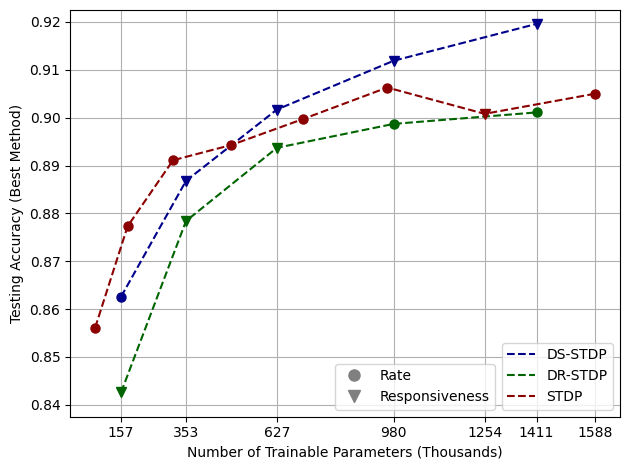

In [46]:
pscale = 784 / 1000

fig, ax = plt.subplots()

ax.plot(
    nbest_acc["x"] * pscale * 2,
    nbest_acc["y_dsstdp"],
    linestyle="--",
    color="darkblue",
    label="DS-STDP",
)

for xi, yi in zip(nbest_acc["x_rate_dsstdp"] * pscale, nbest_acc["y_rate_dsstdp"]):
    ax.plot(xi, yi, marker="o", ms=6.5, color="darkblue")

for xi, yi in zip(nbest_acc["x_ttfs_dsstdp"] * pscale, nbest_acc["y_ttfs_dsstdp"]):
    ax.plot(xi, yi, marker="v", ms=6.5, color="darkblue")

ax.plot(
    nbest_acc["x"] * pscale * 2,
    nbest_acc["y_drstdp"],
    linestyle="--",
    color="darkgreen",
    label="DR-STDP",
)

for xi, yi in zip(nbest_acc["x_rate_drstdp"] * pscale, nbest_acc["y_rate_drstdp"]):
    ax.plot(xi, yi, marker="o", ms=6.5, color="darkgreen")

for xi, yi in zip(nbest_acc["x_ttfs_drstdp"] * pscale, nbest_acc["y_ttfs_drstdp"]):
    ax.plot(xi, yi, marker="v", ms=6.5, color="darkgreen")

ax.plot(
    np.concat((nbest_acc["x"], nbest_acc["x2"])) * pscale,
    nbest_acc["y_stdp"],
    linestyle="--",
    color="darkred",
    label="STDP",
)

for xi, yi in zip(nbest_acc["x_rate_stdp"] * pscale, nbest_acc["y_rate_stdp"]):
    ax.plot(xi, yi, marker="o", ms=6.5, color="darkred")

for xi, yi in zip(nbest_acc["x_ttfs_stdp"] * pscale, nbest_acc["y_ttfs_stdp"]):
    ax.plot(xi, yi, marker="v", ms=6.5, color="darkred")

custom_markers = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="gray",
        linestyle="",
        markersize=8,
        label="Rate",
    ),
    Line2D(
        [0],
        [0],
        marker="v",
        color="gray",
        linestyle="",
        markersize=8,
        label="Responsiveness",
    ),
]

plt.grid(True)
plt.ylim(0.8375, 0.9225)
plt.xlabel("Number of Trainable Parameters (Thousands)")
plt.ylabel("Testing Accuracy (Best Method)")
leg1 = ax.legend(ncol=1, loc="lower right")
leg2 = ax.legend(handles=custom_markers, loc="lower right", bbox_to_anchor=(0.785, 0.0))
ax.add_artist(leg1)
plt.xticks([pscale * n for n in [200, 450, 800, 1250, 1600, 1800, 2025]])
plt.tight_layout()
# plt.show()
plt.savefig("plots/testacc-best-paramscale.png", dpi=1200)

In [47]:
rate_clsacc = {}
for n in (100, 225, 400, 625, 900):
    rate_clsacc[n] = {}
    for k, v in zip(("stdp", "drstdp", "dsstdp"), (stdp_agg, drstdp_agg, dsstdp_agg)):
        rate_clsacc[n][k] = {
            "whislo": v["rate"][n]["clsacc"]["min"],
            "q1": v["rate"][n]["clsacc"]["q1"],
            "med": v["rate"][n]["clsacc"]["median"],
            "q3": v["rate"][n]["clsacc"]["q3"],
            "whishi": v["rate"][n]["clsacc"]["max"],
        }

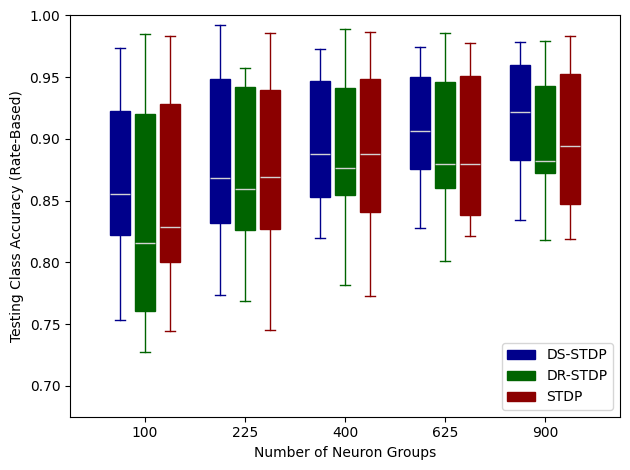

In [48]:
box_width = 0.2
box_space = 0.05
group_space = 1.0

fig, ax = plt.subplots()

bxpstats = [[], [], []]
for n in (100, 225, 400, 625, 900):
    for idx, m in enumerate(("dsstdp", "drstdp", "stdp")):
        bxpstats[idx].append(rate_clsacc[n][m])

positions = [[], [], []]
for group, k in enumerate(rate_clsacc):
    c = group * group_space
    for box, _ in enumerate(rate_clsacc[k]):
        pos = c + (box - 1) * (box_width + box_space)
        positions[box].append(pos)

bp_dsstdp = ax.bxp(
    bxpstats[0],
    positions=positions[0],
    widths=box_width,
    showfliers=False,
    patch_artist=True,
    label="DS-STDP",
)
bp_drstdp = ax.bxp(
    bxpstats[1],
    positions=positions[1],
    widths=box_width,
    showfliers=False,
    patch_artist=True,
    label="DR-STDP",
)
bp_stdp = ax.bxp(
    bxpstats[2],
    positions=positions[2],
    widths=box_width,
    showfliers=False,
    patch_artist=True,
    label="STDP",
)

for color, bp in zip(("darkred", "darkgreen", "darkblue"), (bp_stdp, bp_drstdp, bp_dsstdp)):
    for obj in bp["medians"]:
        obj.set_color("lightgrey")

    for field in ("boxes", "whiskers", "caps"):
        for obj in bp[field]:
            obj.set_color(color)

ax.set_xticks(positions[1])
ax.set_xticklabels((100, 225, 400, 625, 900))
plt.ylim(0.675, 1.0)
plt.xlabel("Number of Neuron Groups")
plt.ylabel("Testing Class Accuracy (Rate-Based)")
plt.legend(ncol=1, loc="lower right")
plt.tight_layout()
#plt.show()
plt.savefig("plots/classacc-rate.png", dpi=1200)

In [49]:
ttfs_clsacc = {}
for n in (100, 225, 400, 625, 900):
    ttfs_clsacc[n] = {}
    for k, v in zip(("stdp", "drstdp", "dsstdp"), (stdp_agg, drstdp_agg, dsstdp_agg)):
        ttfs_clsacc[n][k] = {
            "whislo": v["ttfs"][n]["clsacc"]["min"],
            "q1": v["ttfs"][n]["clsacc"]["q1"],
            "med": v["ttfs"][n]["clsacc"]["median"],
            "q3": v["ttfs"][n]["clsacc"]["q3"],
            "whishi": v["ttfs"][n]["clsacc"]["max"],
        }

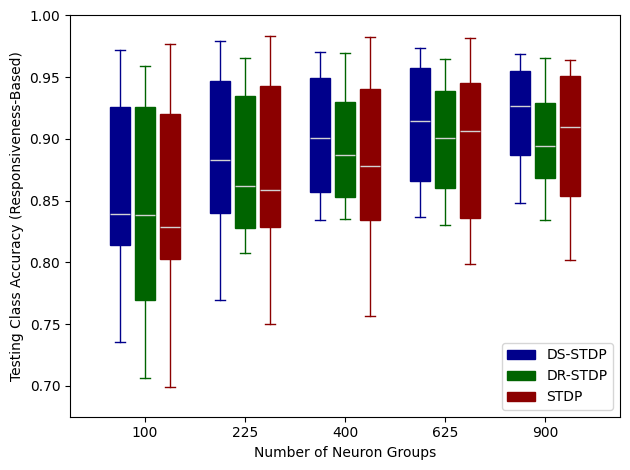

In [50]:
box_width = 0.2
box_space = 0.05
group_space = 1.0

fig, ax = plt.subplots()

bxpstats = [[], [], []]
for n in (100, 225, 400, 625, 900):
    for idx, m in enumerate(("dsstdp", "drstdp", "stdp")):
        bxpstats[idx].append(ttfs_clsacc[n][m])

positions = [[], [], []]
for group, k in enumerate(ttfs_clsacc):
    c = group * group_space
    for box, _ in enumerate(ttfs_clsacc[k]):
        pos = c + (box - 1) * (box_width + box_space)
        positions[box].append(pos)

bp_dsstdp = ax.bxp(
    bxpstats[0],
    positions=positions[0],
    widths=box_width,
    showfliers=False,
    patch_artist=True,
    label="DS-STDP",
)
bp_drstdp = ax.bxp(
    bxpstats[1],
    positions=positions[1],
    widths=box_width,
    showfliers=False,
    patch_artist=True,
    label="DR-STDP",
)
bp_stdp = ax.bxp(
    bxpstats[2],
    positions=positions[2],
    widths=box_width,
    showfliers=False,
    patch_artist=True,
    label="STDP",
)

for color, bp in zip(("darkred", "darkgreen", "darkblue"), (bp_stdp, bp_drstdp, bp_dsstdp)):
    for obj in bp["medians"]:
        obj.set_color("lightgrey")

    for field in ("boxes", "whiskers", "caps"):
        for obj in bp[field]:
            obj.set_color(color)

ax.set_xticks(positions[1])
ax.set_xticklabels((100, 225, 400, 625, 900))
plt.ylim(0.675, 1.0)
plt.xlabel("Number of Neuron Groups")
plt.ylabel("Testing Class Accuracy (Responsiveness-Based)")
plt.legend(ncol=1, loc="lower right")
plt.tight_layout()
#plt.show()
plt.savefig("plots/classacc-ttfs.png", dpi=1200)

In [51]:
delta_acc = {}
delta_acc["x"] = np.array([100, 225, 400, 625, 900])
for k, v in zip(("stdp", "drstdp", "dsstdp"), (stdp_agg, drstdp_agg, dsstdp_agg)):
    delta_acc[f"y_{k}"] = np.array([v["ttfs"][n]["acc"] - v["rate"][n]["acc"] for n in delta_acc["x"]])

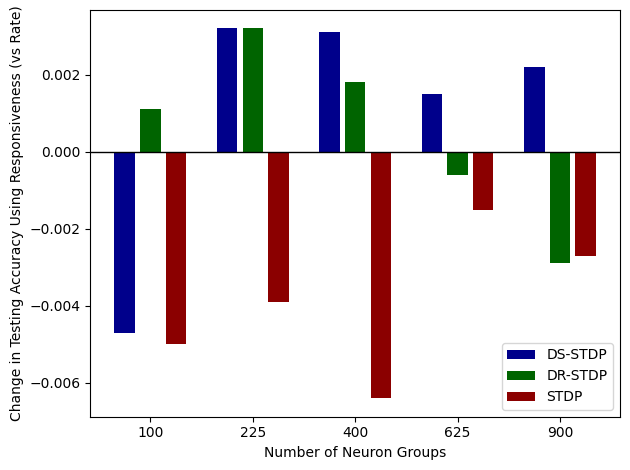

In [52]:
bar_width = 0.2
bar_space = 0.05
group_space = 1.0

fig, ax = plt.subplots()

dsstdp_rects = ax.bar(
    group_space * np.arange(len(delta_acc["x"])) + 0 * (bar_width + bar_space),
    delta_acc["y_dsstdp"],
    bar_width,
    color="darkblue",
    label="DS-STDP",
)
drstdp_rects = ax.bar(
    group_space * np.arange(len(delta_acc["x"])) + 1 * (bar_width + bar_space),
    delta_acc["y_drstdp"],
    bar_width,
    color="darkgreen",
    label="DR-STDP",
)
stdp_rects = ax.bar(
    group_space * np.arange(len(delta_acc["x"])) + 2 * (bar_width + bar_space),
    delta_acc["y_stdp"],
    bar_width,
    color="darkred",
    label="STDP",
)

ax.axhline(0, color="black", linewidth=1)
ax.set_xticks(group_space * np.arange(len(delta_acc["x"])) + (bar_width + bar_space))
ax.set_xticklabels(delta_acc["x"])
plt.xlabel("Number of Neuron Groups")
plt.ylabel("Change in Testing Accuracy Using Responsiveness (vs Rate)")
plt.legend(ncol=1, loc="lower right")
plt.tight_layout()
#plt.show()
plt.savefig("plots/testacc-diff.png", dpi=1200)

In [53]:
weight_var = {}
for n in (100, 225, 400, 625, 900):
    weight_var[n] = {}
    for k, v in zip(("stdp", "drstdp", "dsstdp"), (stdp_data, drstdp_data, dsstdp_data)):
        weight_var[n][k] = {}
        df = v["dyn"][n][v["dyn"][n]["weight.var"].notnull()]
        weight_var[n][k]["x"] = df["sample"].to_numpy()
        weight_var[n][k]["y"] = df["weight.var"].to_numpy()

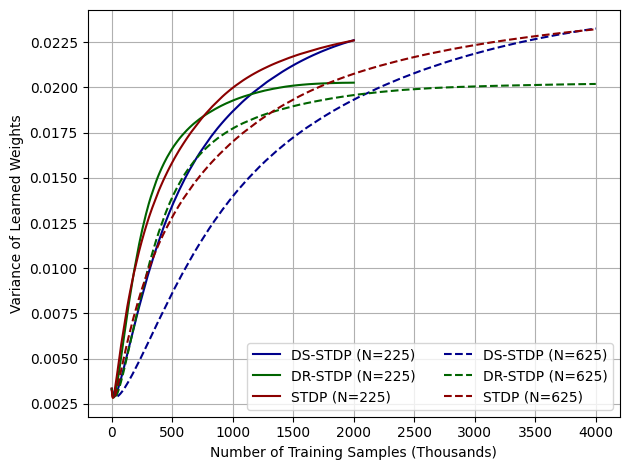

In [54]:
xscale = 1000

fig, ax = plt.subplots()

ax.plot(
    weight_var[225]["dsstdp"]["x"] / xscale,
    weight_var[225]["dsstdp"]["y"],
    linestyle="-",
    color="darkblue",
    label="DS-STDP (N=225)",
)
ax.plot(
    weight_var[225]["drstdp"]["x"] / xscale,
    weight_var[225]["drstdp"]["y"],
    linestyle="-",
    color="darkgreen",
    label="DR-STDP (N=225)",
)
ax.plot(
    weight_var[225]["stdp"]["x"] / xscale,
    weight_var[225]["stdp"]["y"],
    linestyle="-",
    color="darkred",
    label="STDP (N=225)",
)

ax.plot(
    weight_var[625]["dsstdp"]["x"] / xscale,
    weight_var[625]["dsstdp"]["y"],
    linestyle="--",
    color="darkblue",
    label="DS-STDP (N=625)",
)
ax.plot(
    weight_var[625]["drstdp"]["x"] / xscale,
    weight_var[625]["drstdp"]["y"],
    linestyle="--",
    color="darkgreen",
    label="DR-STDP (N=625)",
)

ax.plot(
    weight_var[625]["stdp"]["x"] / xscale,
    weight_var[625]["stdp"]["y"],
    linestyle="--",
    color="darkred",
    label="STDP (N=625)",
)

plt.grid(True)
plt.xlabel("Number of Training Samples (Thousands)")
plt.ylabel("Variance of Learned Weights")
plt.legend(ncol=2, loc="lower right")
plt.tight_layout()
#plt.show()
plt.savefig("plots/weight-var.png", dpi=1200)

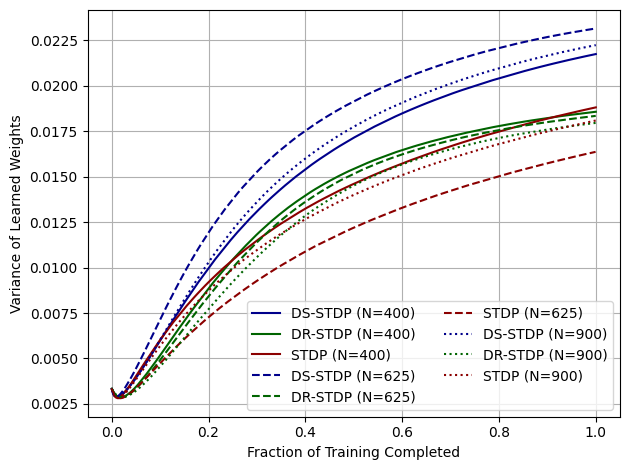

In [55]:
fig, ax = plt.subplots()

select = weight_var[400]["dsstdp"]["x"] <= (dsstdp_agg["rate"][400]["epoch"] * 50000)
ax.plot(
    weight_var[400]["dsstdp"]["x"][select] / (dsstdp_agg["rate"][400]["epoch"] * 50000),
    weight_var[400]["dsstdp"]["y"][select],
    linestyle="-",
    color="darkblue",
    label="DS-STDP (N=400)",
)
select = weight_var[400]["drstdp"]["x"] <= (drstdp_agg["rate"][400]["epoch"] * 50000)
ax.plot(
    weight_var[400]["drstdp"]["x"][select] / (drstdp_agg["rate"][400]["epoch"] * 50000),
    weight_var[400]["drstdp"]["y"][select],
    linestyle="-",
    color="darkgreen",
    label="DR-STDP (N=400)",
)
select = weight_var[400]["stdp"]["x"] <= (stdp_agg["rate"][400]["epoch"] * 50000)
ax.plot(
    weight_var[400]["stdp"]["x"][select] / (stdp_agg["rate"][400]["epoch"] * 50000),
    weight_var[400]["stdp"]["y"][select],
    linestyle="-",
    color="darkred",
    label="STDP (N=400)",
)

select = weight_var[625]["dsstdp"]["x"] <= (dsstdp_agg["rate"][625]["epoch"] * 50000)
ax.plot(
    weight_var[625]["dsstdp"]["x"][select] / (dsstdp_agg["rate"][625]["epoch"] * 50000),
    weight_var[625]["dsstdp"]["y"][select],
    linestyle="--",
    color="darkblue",
    label="DS-STDP (N=625)",
)
select = weight_var[625]["drstdp"]["x"] <= (drstdp_agg["rate"][625]["epoch"] * 50000)
ax.plot(
    weight_var[625]["drstdp"]["x"][select] / (drstdp_agg["rate"][625]["epoch"] * 50000),
    weight_var[625]["drstdp"]["y"][select],
    linestyle="--",
    color="darkgreen",
    label="DR-STDP (N=625)",
)
select = weight_var[625]["stdp"]["x"] <= (stdp_agg["rate"][625]["epoch"] * 50000)
ax.plot(
    weight_var[625]["stdp"]["x"][select] / (stdp_agg["rate"][625]["epoch"] * 50000),
    weight_var[625]["stdp"]["y"][select],
    linestyle="--",
    color="darkred",
    label="STDP (N=625)",
)


select = weight_var[900]["dsstdp"]["x"] <= (dsstdp_agg["rate"][900]["epoch"] * 50000)
ax.plot(
    weight_var[900]["dsstdp"]["x"][select] / (dsstdp_agg["rate"][900]["epoch"] * 50000),
    weight_var[900]["dsstdp"]["y"][select],
    linestyle=":",
    color="darkblue",
    label="DS-STDP (N=900)",
)
select = weight_var[900]["drstdp"]["x"] <= (drstdp_agg["rate"][900]["epoch"] * 50000)
ax.plot(
    weight_var[900]["drstdp"]["x"][select] / (drstdp_agg["rate"][900]["epoch"] * 50000),
    weight_var[900]["drstdp"]["y"][select],
    linestyle=":",
    color="darkgreen",
    label="DR-STDP (N=900)",
)
select = weight_var[900]["stdp"]["x"] <= (stdp_agg["rate"][900]["epoch"] * 50000)
ax.plot(
    weight_var[900]["stdp"]["x"][select] / (stdp_agg["rate"][900]["epoch"] * 50000),
    weight_var[900]["stdp"]["y"][select],
    linestyle=":",
    color="darkred",
    label="STDP (N=900)",
)

plt.grid(True)
plt.xlabel("Fraction of Training Completed")
plt.ylabel("Variance of Learned Weights")
plt.legend(ncol=2, loc="lower right")
plt.tight_layout()
plt.show()
#plt.savefig("plots/weight-var.png", dpi=1200)